# **Burhanuddin Abizer Hariyanawala**
## *CC-OL-10552*
### Task 1: Fake News Detection
### *Task Description:* **A king of yellow journalism, fake news is false information and hoaxes spread through social media and other online media to achieve a political agenda. In this data science project idea, we will use Python to build a model that can accurately detect whether a piece of news is real or fake. We'll build a TfidfVectorizer and use a PassiveAggressiveClassifier to classify news into "Real" and "Fake". We'll be using a dataset of shape 7796×4 and execute everything in Jupyter Lab.**


## Import Neccessary Modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reviewing the Data

In [14]:
data = pd.read_csv('/content/news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
data.shape

(6335, 4)

In [16]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

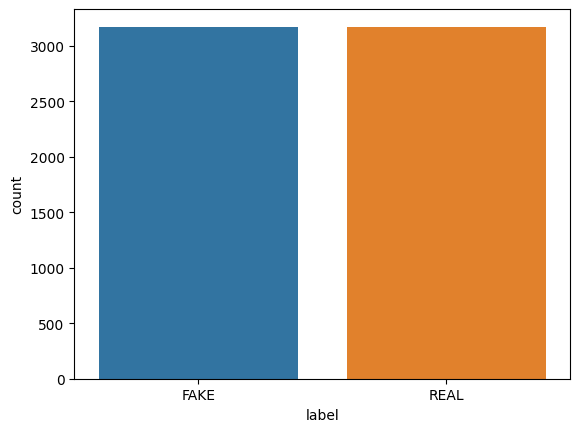

In [19]:
sns.countplot(x=data.label)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [21]:
X_train , X_test , y_train , y_test = train_test_split(data['text'] , data['label'] , test_size=0.25 , random_state=1)

In [22]:
tfidf_vector = TfidfVectorizer(stop_words='english' , max_df=0.7)

tfidf_train = tfidf_vector.fit_transform(X_train)
tfidf_test = tfidf_vector.transform(X_test)

In [23]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train , y_train)

y_pred = pac.predict(tfidf_test)

In [24]:
score = print(accuracy_score(y_test,y_pred))

0.9412878787878788


In [50]:
confusion_matrix(y_test,y_pred , labels=['FAKE','REAL'])

array([[766,  51],
       [ 42, 725]])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.95      0.94      0.94       817
        REAL       0.93      0.95      0.94       767

    accuracy                           0.94      1584
   macro avg       0.94      0.94      0.94      1584
weighted avg       0.94      0.94      0.94      1584



In [34]:
def fake_news_detect(news):
  input = [news]
  vectorized_input = tfidf_vector.transform(input)
  predict = pac.predict(vectorized_input)
  return print(predict)

In [35]:
fake_news_detect('ADHD NATION: How Big Pharma Created the ADHD Epidemic')

['FAKE']


In [37]:
fake_news_detect("Why Ted Cruz Has the Most to Lose in New Hampshire")

['REAL']


In [42]:
fake_news_detect('Mr. Trump will ensure every veteran has the choice to seek care at the VA or at a private service provider of their own choice. Under a Trump Administration, no veteran will die waiting for service.')

['FAKE']
